# <div align = 'center'> Lectura 2 Análisis de Regresión Simple </div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        2.1 Regresión Simple MCO <br>
        2.2 Coeficientes, Valores Ajustados y Residuos <br>
          </font>
        </div>

In [2]:
import wooldridge as woo
import numpy as np

woo.dataWoo('ceosal1', description=True)
ceosal1 = woo.dataWoo('ceosal1')

x = ceosal1['roe']
# print(x)
y = ceosal1['salary']
# print(y)
# ingredientes para la formula de MCO:
print(np.cov(x, y))
# cov_xy = np.cov(x, y)[1, 0]  # acceder a 2. fila y 1. columna de la matriz de covarianza
# print(cov_xy)
# var_x = np.var(x, ddof=1)
# x_bar = np.mean(x)
# y_bar = np.mean(y)




name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.
[[7.25649898e+01 1.34253840e+03]
 [1.34253840e+03 1.88333164e+06]]


In [10]:
#cálculo manual de los coeficientes MCO:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 18.50118634521492

b0: 963.191336472558



In [8]:
import wooldridge as woo
import statsmodels.formula.api as smf

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



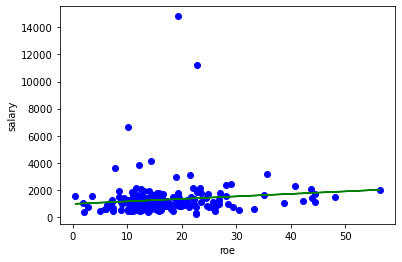

In [10]:
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

# Regresión de MCO:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# scatter plot and fitted values:
plt.plot('roe', 'salary', data=ceosal1, color='blue', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='green', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.savefig('Regresion_Salary_Roe.png')

In [3]:
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='wage ~ educ', data=wage1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept   -0.904852
educ         0.541359
dtype: float64



name of dataset: vote1
no of variables: 10
no of observations: 173

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| state    | state postal code               |
| district | congressional district          |
| democA   | =1 if A is democrat             |
| voteA    | percent vote for A              |
| expendA  | camp. expends. by A, $1000s     |
| expendB  | camp. expends. by B, $1000s     |
| prtystrA | % vote for president            |
| lexpendA | log(expendA)                    |
| lexpendB | log(expendB)                    |
| shareA   | 100*(expendA/(expendA+expendB)) |
+----------+---------------------------------+

From M. Barone and G. Ujifusa, The Almanac of American Politics, 1992.
Washington, DC: National Journal.
b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



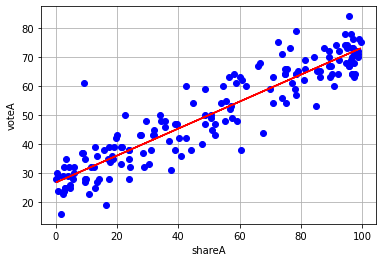

In [21]:
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

woo.dataWoo('vote1', description=True)
vote1 = woo.dataWoo('vote1')

# OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# scatter plot and fitted values:
plt.plot('shareA', 'voteA', data=vote1, color='blue', marker='o', linestyle='',linewidth='1')
plt.plot(vote1['shareA'], results.fittedvalues, color='red', linestyle='-')
plt.ylabel('voteA')
plt.xlabel('shareA')
plt.grid()
plt.savefig("Regresión_vote1.jpg")

# Coeficientes, Valores Ajustados y Residuos

In [31]:
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

#control +llave derecha 

ceosal1 = woo.dataWoo('ceosal1')
#Regresión MCO

reg = smf.ols(formula='salary ~ roe', data= ceosal1)
results = reg.fit()

#Obtenemos los valores predecidos y residuos
salary_hat = results.fittedvalues
u_hat = results.resid

#Los resultados
table = pd.DataFrame({'roe':ceosal1['roe'], 'salary':ceosal1['salary'],
                    'salary_hat':salary_hat,'u_hat':u_hat})
table["unid_salarios"]=table["salary"]*table["roe"]
table



,roe,salary,salary_hat,u_hat,unid_salarios
0,14.1,1095,1224.058071,-129.058071,15439.500418
1,10.9,1001,1164.854261,-163.854261,10910.899618
2,23.5,1122,1397.969216,-275.969216,26367.000000
3,5.9,578,1072.348338,-494.348338,3410.200055
4,13.8,1368,1218.507712,149.492288,18878.400261
...,...,...,...,...,...
204,9.0,930,1129.702014,-199.702014,8370.000000
205,15.5,525,1249.959725,-724.959725,8137.500000
206,12.1,658,1187.055698,-529.055698,7961.800251
207,13.7,555,1216.657586,-661.657586,7603.499894


In [36]:
#Propiedades
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

wage1 = woo.dataWoo('wage1')
reg = smf.ols(formula='wage ~ educ', data= wage1)
results = reg.fit()

#Obtenemos los coeficientes, valores predecidos y residuos

b= results.params
wage_hat = results.fittedvalues
u_hat = results.resid


In [37]:
#Media Cero de los Errores
u_hat_mean = np.mean(u_hat)
print('Media cero de los errores:', u_hat_mean)

Media cero de los errores: -4.594550342213005e-15


In [52]:
#Relación de los Errores con la variable Independiente
educ_u_cov_1 = np.cov(wage1['educ'], u_hat)[1,0]
print('Covarianza entre edu y u:',educ_u_cov_1)


educ_u_cov_2 = np.cov(wage1['educ'], u_hat)[0,1]
print('Covarianza entre edu y u:',educ_u_cov_2)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 526 and the array at index 1 has size 209

In [50]:
#La media de los salarios y salarios predecidos
educ_mean = np.mean(wage1['educ'])
educ_mean

wage_pred = b[0] + b[1]*educ_mean
print('Salarios Predecidos: ',wage_pred)


wage_mean = np.mean(wage_pred)
print('Salarios Media: ', wage_mean)

Salarios Predecidos:  5.8961026747870395
Salarios Media:  5.8961026747870395


In [53]:
#Bondad de Ajuste
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')
#Regresión MCO

reg = smf.ols(formula='salary ~ roe', data= ceosal1)
results = reg.fit()

#Obtenemos los valores predecidos y residuos
sal_hat = results.fittedvalues
u_hat = results.resid

#Calculamos el R^2 en tres formas diferentes
sal = ceosal1['salary']
R2_a = np.var(sal_hat,ddof=1)/np.var(sal, ddof =1)
R2_b = 1- np.var(u_hat, ddof=1)/ np.var(sal,ddof =1)
R2_c = np.corrcoef(sal, sal_hat)[1,0]**2

print('R2_a: ',R2_a)
print('R2_b: ',R2_b)
print('R2_c: ',R2_c)

R2_a:  0.013188624081034123
R2_b:  0.01318862408103405
R2_c:  0.013188624081034106


In [33]:
#Tabla Resumen de Resultados
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

vote1 = woo.dataWoo('vote1')

# OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()

print('Tabla Resultado',results.summary())

#mide el porcentaje de variacion de la y mediante las x 

Tabla Resultado                             OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           6.63e-74
Time:                        16:29:57   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887    

In [35]:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse,4),
                      't': round(results.tvalues,4),
                      'pval': round(results.pvalues, 4)})
    
table

,b,se,t,pval
Intercept,26.8122,0.8872,30.2207,0.0
shareA,0.4638,0.0145,31.9008,0.0


In [37]:
# Logaritmos
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

wage1 = woo.dataWoo('wage1')
#Estimamos log-nivel
reg = smf.ols(formula='np.log(wage) ~ educ', data= wage1)
results = reg.fit()
b = results.params

print('b:\n',b)

b: 
 Intercept    0.583773
educ         0.082744
dtype: float64


In [40]:
#Estimamos log-log
reg = smf.ols(formula='np.log(salary) ~ np.log(sales)', data=ceosal1)
results = reg.fit()
b = results.params
print('b:\n',b)

b:
 Intercept        4.821996
np.log(sales)    0.256672
dtype: float64


In [46]:
#Regresión sin Intercepto
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

#Regresión MCO usual
reg1 = smf.ols(formula='salary ~ roe', data=ceosal1)
results1 = reg1.fit()
b_1 = results1.params
print('b_1:\n',b_1)

b_1:
 Intercept    963.191336
roe           18.501186
dtype: float64


In [49]:
#Regresión sin Intercepto
reg2 = smf.ols(formula='salary ~ 0 + roe', data= ceosal1)
results2 = reg2.fit()
b_2 = results2.params
print('b_2:\n',b_2)

b_2:
 roe    63.537955
dtype: float64


In [51]:
##Regresión sin pendiente
reg3 = smf.ols(formula='salary ~ 1', data= ceosal1)
results3 = reg3.fit()
b_3 = results3.params
print('b_3:\n',b_3 )

b_3:
 Intercept    1281.119617
dtype: float64


In [52]:
#media de y
sal_mean = np.mean(ceosal1['salary'])
print('sal_mean:\n', sal_mean)

sal_mean:
 1281.1196172248804


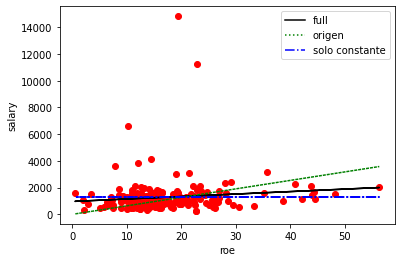

In [60]:
#Gráfico
plt.plot('roe','salary',data=ceosal1, color='red', marker='o', linestyle='', label='')
plt.plot(ceosal1['roe'],results1.fittedvalues, color='black', linestyle='-', label='full')
plt.plot(ceosal1['roe'],results2.fittedvalues, color='green', linestyle=':', label='origen')
plt.plot(ceosal1['roe'],results3.fittedvalues, color='blue', linestyle='-.', label='solo constante')
plt.ylabel('salary')
plt.xlabel('roe')
plt.legend()
plt.savefig('MCO_salary_Roe.pdf')